In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import (classification_report, confusion_matrix, f1_score,
                             precision_score, recall_score)

In [8]:
df = pd.read_csv('..\datasets\dataset-4000sentencas-multilabel.csv')
df_maritaca = pd.read_csv('..\datasets\dataset-maritaca-multilabel.csv')

In [9]:
labels = ['ambiente', 'bebida', 'comida', 'geral', 'localização', 'outros', 'preço', 'serviço']

# Encontrar as linhas que não foram classificadas
zero_rows = df_maritaca[(df_maritaca[labels] == 0).all(axis=1)]

# Obtendo os indices
descarte_indices = zero_rows.index.tolist()

# Descartando as linhas nulas
df_maritaca = df_maritaca.drop(descarte_indices)
df = df.drop(descarte_indices)

In [10]:
y_true = df[labels]  # Valores reais
y_pred = df_maritaca[labels]  # Previsões

# Calcular as métricas
f1_macro = f1_score(y_true, y_pred, average='macro')
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_micro = f1_score(y_true, y_pred, average='micro')
precision_micro = precision_score(y_true, y_pred, average='micro')
recall_micro = recall_score(y_true, y_pred, average='micro')

# Exibir as métricas calculadas
print(f"F1-Score Macro: {f1_macro:.4f}")
print(f"Precision Macro: {precision_macro:.4f}")
print(f"Recall Macro: {recall_macro:.4f}")
print(f"F1-Score Micro: {f1_micro:.4f}")
print(f"Precision Micro: {precision_micro:.4f}")
print(f"Recall Micro: {recall_micro:.4f}")

F1-Score Macro: 0.6769
Precision Macro: 0.6192
Recall Macro: 0.7763
F1-Score Micro: 0.7997
Precision Micro: 0.7411
Recall Micro: 0.8684


In [11]:
report = classification_report(y_true, y_pred, target_names=labels)
print(report)

              precision    recall  f1-score   support

    ambiente       0.72      0.94      0.81      1244
      bebida       0.55      0.91      0.68       394
      comida       0.87      0.96      0.92      2073
       geral       0.62      0.53      0.57      1168
 localização       0.43      0.92      0.58       200
      outros       0.06      0.09      0.07        97
       preço       0.91      0.89      0.90       771
     serviço       0.80      0.97      0.88      1401

   micro avg       0.74      0.87      0.80      7348
   macro avg       0.62      0.78      0.68      7348
weighted avg       0.76      0.87      0.80      7348
 samples avg       0.78      0.87      0.80      7348



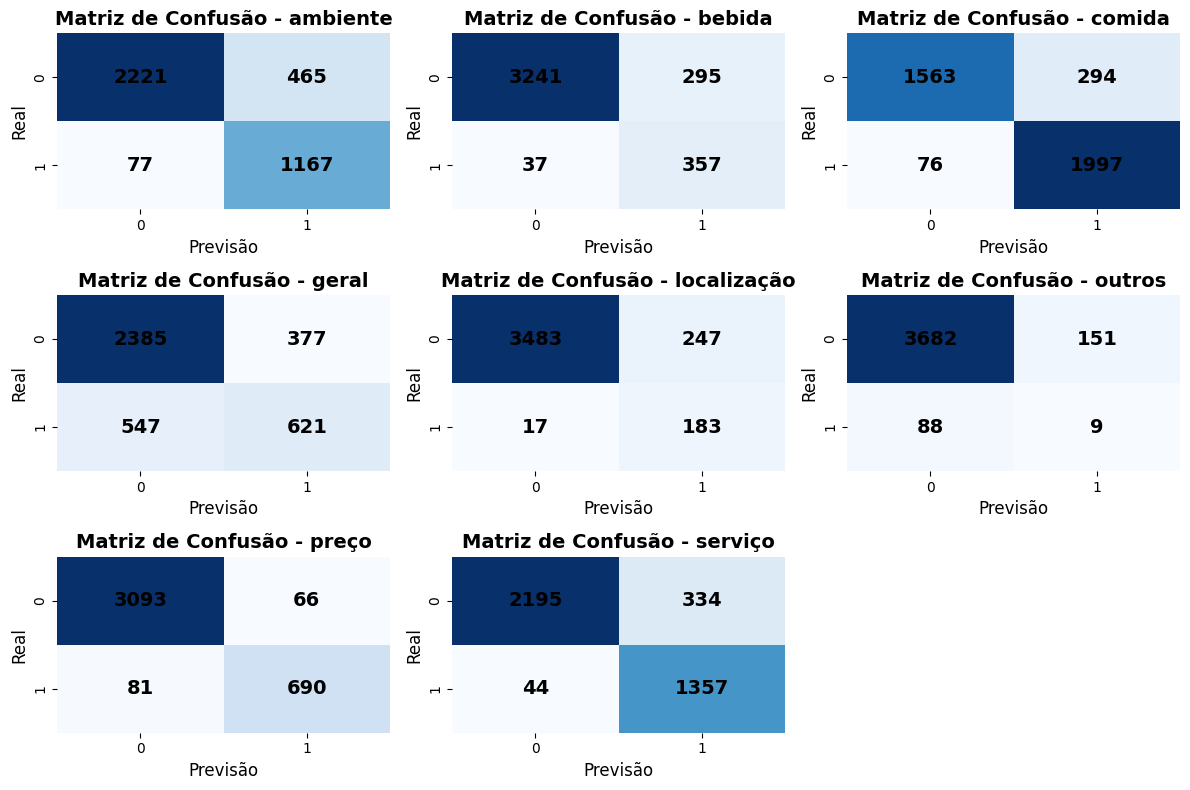

In [12]:
plt.figure(figsize=(12, 8))

# Iterar sobre cada coluna para calcular a matriz de confusão e plotar usando Seaborn
for i, coluna in enumerate(labels, 1):
    plt.subplot(3, 3, i)
    
    y_true = df[coluna]  # Valores reais para a coluna atual
    y_pred = df_maritaca[coluna]  # Previsões para a coluna atual
    
    # Calcular a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Gerar a matriz de confusão usando Seaborn
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                annot_kws={'size': 14, 'color': 'black', 'weight': 'bold'})
    
    plt.title(f'Matriz de Confusão - {coluna}', size=14, weight='bold')
    plt.xlabel('Previsão', size=12)
    plt.ylabel('Real', size=12)

plt.tight_layout()
plt.show()